### Python module/package imports for this chapter

In [1]:
import sys, os, math, random, functools

import numpy as np

import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim

%matplotlib inline

from IPython.display import display, HTML

### Code from previous videos (enhanced)

In [2]:
from turtle import Turtle, Terrarium

## Making fractals with functional Python

In [3]:
def snowflake(turtle,dist,level):
    for i in range(3):
        drawkoch(turtle,dist,level)
        turtle.right(120)

def drawkoch(turtle,distance,level):
    if level == 0:
        turtle.forward(distance)
    else:
        drawkoch(turtle,distance/3,level-1)
        turtle.left(60)
        drawkoch(turtle,distance/3,level-1)
        turtle.left(-120)
        drawkoch(turtle,distance/3,level-1)
        turtle.left(60)
        drawkoch(turtle,distance/3,level-1)

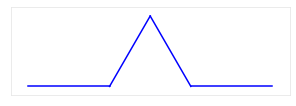

In [4]:
with Terrarium() as t:
    drawkoch(Turtle(t),100,1)

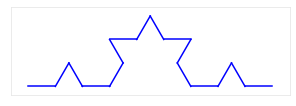

In [5]:
with Terrarium() as t:
    drawkoch(Turtle(t),100,2)

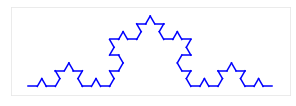

In [6]:
with Terrarium() as t:
    drawkoch(Turtle(t),100,3)

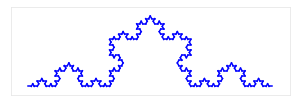

In [8]:
with Terrarium(animate=False) as t:
    drawkoch(Turtle(t),100,4)

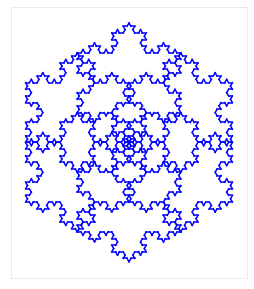

In [9]:
with Terrarium() as t:
    t1 = Turtle(t)
    
    def flake():
        snowflake(t1,30,3)
        
    def left():
        t1.left(60)
    
    for f in [flake,left] * 6:
        f()

In [10]:
def over(a,b):
    return a/b

In [11]:
inverse = functools.partial(over,1)
half = functools.partial(over,b=2)

In [12]:
inverse(2)

0.5

In [13]:
half(3)

1.5

In [14]:
inverse

functools.partial(<function over at 0x000001D23C6CF8B8>, 1)

In [15]:
def F(dist):
    return functools.partial(Turtle.forward,distance=dist)

def L(ang):
    return functools.partial(Turtle.left,angle=ang)

In [16]:
f100 = F(100)

with Terrarium() as t:
    f100(Turtle(t))

In [17]:
def funckoch(steps):
    newsteps = []
    
    for step in steps:
        if step.func is Turtle.forward:
            F3 = F(step.keywords['distance']/3)
            newsteps += [F3,L(60),F3,L(-120),F3,L(60),F3]
        else:
            newsteps += [step]
            
    return newsteps

In [18]:
step0 = [F(100)]

In [19]:
funckoch(step0)

[functools.partial(<function Turtle.forward at 0x000001D2383A01F8>, distance=33.333333333333336),
 functools.partial(<function Turtle.left at 0x000001D2383A0318>, angle=60),
 functools.partial(<function Turtle.forward at 0x000001D2383A01F8>, distance=33.333333333333336),
 functools.partial(<function Turtle.left at 0x000001D2383A0318>, angle=-120),
 functools.partial(<function Turtle.forward at 0x000001D2383A01F8>, distance=33.333333333333336),
 functools.partial(<function Turtle.left at 0x000001D2383A0318>, angle=60),
 functools.partial(<function Turtle.forward at 0x000001D2383A01F8>, distance=33.333333333333336)]

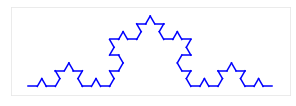

In [20]:
with Terrarium() as t:
    t1 = Turtle(t)
    
    for f in funckoch(funckoch(funckoch(step0))):
        f(t1)

In [21]:
def iterated(f,n):
    def iterf(arg):
        ret = arg
        for i in range(n):
            ret = f(ret)
        return ret
    
    return iterf

In [22]:
def turtle_map(self,steps):
    for step in steps:
        step(self)
        
Turtle.map = turtle_map

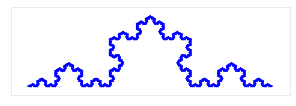

In [23]:
with Terrarium() as t:
    Turtle(t).map(iterated(funckoch,5)(step0))

In [24]:
triangle = [F(100),L(-120),F(100),L(-120),F(100)]

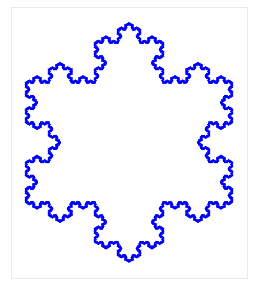

In [26]:
with Terrarium(animate=True,duration=2) as t:
    Turtle(t).map(iterated(funckoch,5)(triangle))